<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>
</p></center>

<h1><center><font size=8>Credit Card Users Churn Prediction</center></font></h1>
<h1><center>Analitis, Iraklis - Project 5</center></h1>

# **Introduction**

## **Description**
### *Background and Context*

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

You need to identify the best possible model that will give the required performance.

### *Objective*

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not.
* Optimize the model using appropriate techniques.
* Generate a set of insights and recommendations that will help the bank.

## **Data Dictionary**

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

###  Importing Libraries 

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from pandas.core.common import random_state

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for oversampling and undersampling the dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

###   Read the dataset 

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read .csv file to construct DataFrame object
bank = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project5/BankChurners.csv')

###    Data Overview 

In [4]:
# let's create a copy of the data
data = bank.copy()

In [5]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


###     Printing the information 

In [6]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

####  Observations 
* There are 10127 rows and 21 columns. 
* All the columns have 10127 non-null values except Education Level and Marital Status.  

####  Let's check for duplicate values 

In [7]:
data.duplicated().sum()

0

####   Let's check for percentage of missing values 

In [8]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

####  Observations 
- Education Level has 15.0% missing values and Marital Status has 7.4% missing values. 

Let's check the statistical summary for the data so that we can find an appropriate way to impute the missing values. 

###  Statistical summary 

In [9]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


# **Exploratory Data Analysis and Insights**

In [10]:
# Creating a list of categorical columns.
categorical_cols = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]
# Creating a list of numerical columns.
numerical_cols = [
    "CLIENTNUM",
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

In [11]:
# Looking at the skew values of each numerical column
data.skew()

CLIENTNUM                   0.996
Customer_Age               -0.034
Dependent_count            -0.021
Months_on_book             -0.107
Total_Relationship_Count   -0.162
Months_Inactive_12_mon      0.633
Contacts_Count_12_mon       0.011
Credit_Limit                1.667
Total_Revolving_Bal        -0.149
Avg_Open_To_Buy             1.662
Total_Amt_Chng_Q4_Q1        1.732
Total_Trans_Amt             2.041
Total_Trans_Ct              0.154
Total_Ct_Chng_Q4_Q1         2.064
Avg_Utilization_Ratio       0.718
dtype: float64

###   Univariate EDA on Numerical Columns  

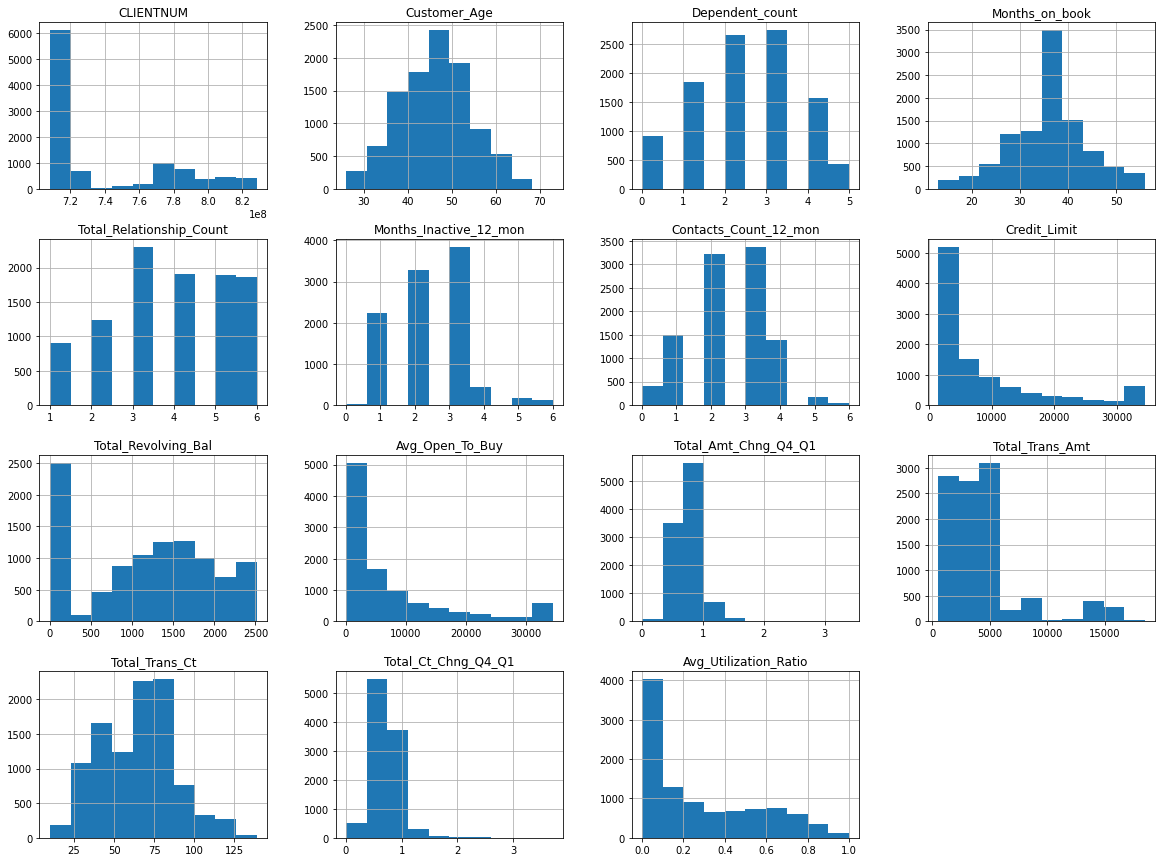

In [12]:
# Creating histograms of all numerical columns
data[numerical_cols].hist(figsize=(20, 15))
plt.show()

####  Observations  
* The **CLIENTNUM** distribution is very right-skewed.
* The **Customer_Age** distribution is fairly normal but slightly left-skewed. 
* The **Dependent_count** distribution is also fairly normal but slightly left-skewed.
* The **Months_on_book** distribution is fairly normal but slightly left-skewed.
* The **Total_Relationship_Count** distribution is fairly normal but slightly left-skewed.
* The **Months_Inactive_12_mon** distribution is right-skewed.
* The **Contacts_Count_12_mon** distribution is fairly normal but slightly right-skewed.
* The **Credit_Limit** distribution is very right-skewed.
* The **Total_Revolving_Bal** distribution is fairly normal but slightly left-skewed due to many customers with very low balances.
* The **Avg_Open_To_Buy** distribution is very right-skewed.
* The **Total_Amt_Chng_Q4_Q1** distribution is very right-skewed.
* The **Total_Trans_Amt** distribution is very right-skewed.
* The **Total_Trans_Ct** distribution is fairly normal but slightly right-skewed.
* The **Total_Ct_Chng_Q4_Q1** distribution is very right-skewed.
* The **Avg_Utilization** distribution is right-skewed.


###   Univariate EDA on Categorical Columns 

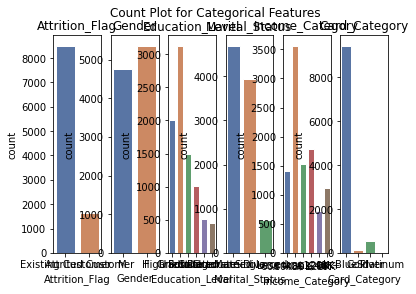

In [13]:
# Produce count plots of all 6 categorical columns
fig, axes = plt.subplots(1, 6)
fig.suptitle("Count Plot for Categorical Features")
sns.set(rc={"figure.figsize": (30, 10)})

sns.countplot(ax=axes[0], x=categorical_cols[0], data=data)
axes[0].set_title(categorical_cols[0])

sns.countplot(ax=axes[1], x=categorical_cols[1], data=data)
axes[1].set_title(categorical_cols[1])

sns.countplot(ax=axes[2], x=categorical_cols[2], data=data)
axes[2].set_title(categorical_cols[2])

sns.countplot(ax=axes[3], x=categorical_cols[3], data=data)
axes[3].set_title(categorical_cols[3])

sns.countplot(ax=axes[4], x=categorical_cols[4], data=data)
axes[4].set_title(categorical_cols[4])

sns.countplot(ax=axes[5], x=categorical_cols[5], data=data)
axes[5].set_title(categorical_cols[5])

plt.show()

####  Observations 
* **Attrition_Flag** of most of the customers is existing and then we see a much smaller number of attrited customers that closed their account.
* **Gender** of most of the customers is female, but it is not a huge difference. 
* **Education_Level** of most of the customers is Graduate. The second largest group is High-School. 
* The **Marital_Status** of most customers is Married. The second largest is Single. The smallest group is those that are Divorced.
* **Income_Category** of most of the customers is less than 40K. The second largest group is the next bin up at $40K-60K. We also notice a large group of customers with an incorrect category of 'abc' that we can probably remove and treat for.  
* **Card_Category** of most of the customers is Blue. The second largest group is Silver members. If we assume that Blue is the base card then we can probably bin these categories to the 'Basic Members' and 'Premium Members'.


###   Bivariate EDA  

####   Correlation Plot 

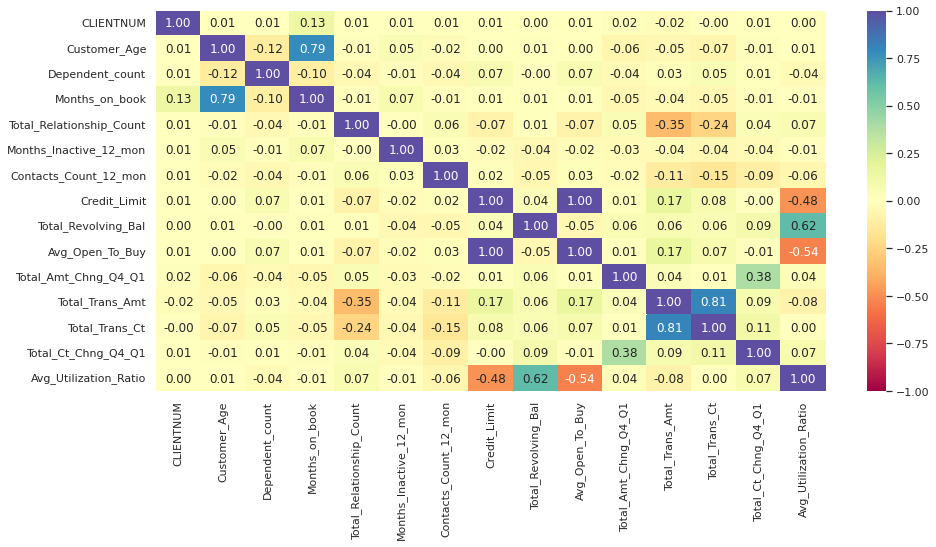

In [14]:
# Plot the correlations between numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####  Observations 
* We don't see many significant correlations throughout the set, except for a few noticeable exceptions. 
* The most notable correlation is the direct positive correlation seen between **Credit_Limit** and **Avg_Open_To_Buy**.
* We also see very strong positive correlations between **Months_on_book** and **Customer_Age**, **Total_Trans_Amt** and **Total_Trans_Ct**, and **Total_Revolving_Bal** and **Avg_Utilization_Ratio**.
* The strongest negative correlations are seen between both **Avg_Open_To_Buy** and **Credit_Limit** with **Avg_Utilization_Ratio**.
* There are also a few other positive correlations like **Total_Ct_Chng_Q4_Q1** and **Total_Amt_Chng_Q4_Q1**, and some other negative correlations; however, these are all not as strong as the previously mentioned correlations.


**Let's check the relationship between Attrition_Flag and the Numerical Columns**

In [15]:
# Mean of numerical variables grouped by attrition
data.groupby(["Attrition_Flag"])[numerical_cols].mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,735261381.264,46.659,2.403,36.178,3.280,2.693,2.972,8136.039,672.823,7463.216,0.694,3095.026,44.934,0.554,0.162
Existing Customer,739927217.885,46.262,2.335,35.881,3.915,2.274,2.356,8726.878,1256.604,7470.273,0.773,4654.656,68.673,0.742,0.296


####  Observations 
* We can probably ignore the observation on the client number as that is just a unique ID.
* The most notable difference between active and closed accounts can be seen in the means for *Total_Revolving_Bal** and **Avg_Utilization_Ratio** as the existing customers have a mean nearly double that of the attrited customers.
* There is also a significant difference between the two customer types in the **Total_Trans_Amt** and **Total_Trans_Ct** as we see the existing customers have signifcantly larger means in these two columns.

**Let's check the relationship between Attrition_Flag and Categorical Columns**

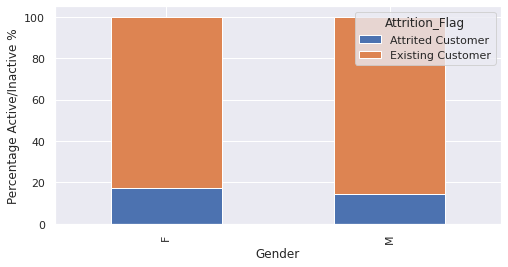

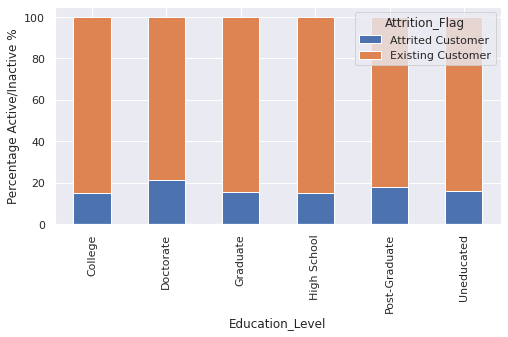

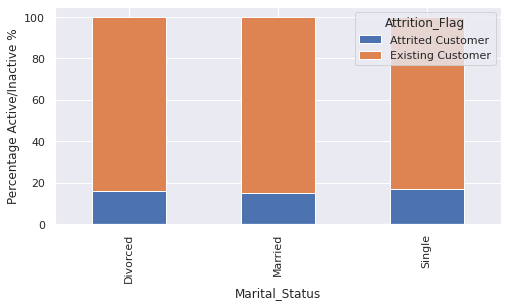

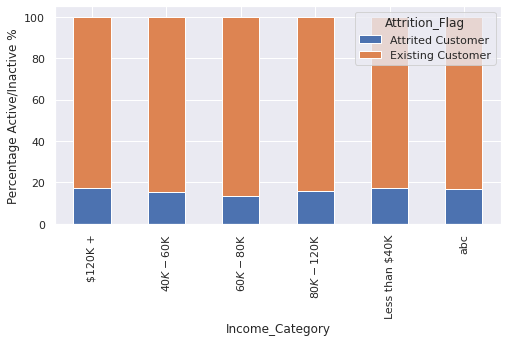

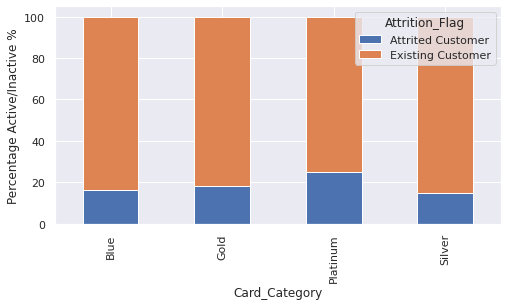

In [16]:
# Plot crosstab percentages across the categorical columns based on Attrition_Flag values
for i in categorical_cols:
    if i != "Attrition_Flag":
        (pd.crosstab(data[i], data["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar", figsize=(8, 4), stacked=True
        )
        plt.ylabel("Percentage Active/Inactive %")

####  Observations 
* A slightly larger percentage of women closed their accounts.
* The largest attrition rate is seen among those with a doctoral degree, but they are relatively similar across the education levels.
* The attrition rates are quite similar across marital statuses as well, but the single members do have a slightly higher percentage.
* The attrition rate is also similar across income bins, but those making <$40K have a slightly higher percentage than the others.
* The attrition rate across the card types is also quite similar, but unexpectedly we do see that the 'Platinum' members have the highest attrition rate and it is one of the most signifcant differences across any of the categorical columns.

#  Data Pre-Processing


- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [17]:
# Dropping column - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

**I think that we should convert the Card_Category column into a binary of 'Basic' membership and 'Premium membership. The 'Blue' category will be the basic membership and all others are premium.**


In [18]:
# Binning Card_Category to Basic and Premium Types
data["Card_Category"] = data["Card_Category"].replace("Blue", "Basic")
data["Card_Category"] = data["Card_Category"].replace(["Silver", "Gold", "Platinum"], "Premium")

**I think that we should also remove all rows with 'abc' as their Income_Category as I am not confident in the validity of their other values since their income was not reported seriously.**

In [19]:
# Removing all rows with 'abc' as Income_Category
data = data[data.Income_Category != "abc"]

**Let's see the counts of all columns with null values.**

In [20]:
# Return null counts
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1374
Marital_Status               667
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**A substantial number of both columns seen before still have null values. I do not think it would be wise to drop these from either and they are significant percentages of those columns so replacing them with the most common category may not be the best choice as well. Let's mark them as unknown to avoid blurring the valuable data from the other rows with any other category.**

In [21]:
# Filling null values with "Unknown"
data = data.fillna("Unknown")

**Let's verify that they are now all non-null.**

In [22]:
# Return null counts
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Let's also convert all columns that should be categorical to type category.**

In [23]:
# Convert all categorical columns that we specified earlier to type category
for col in categorical_cols:
    data[col] = data[col].astype('category')

**Let's check that all of our columns are either categorical or numerical types.**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            9015 non-null   category
 1   Customer_Age              9015 non-null   int64   
 2   Gender                    9015 non-null   category
 3   Dependent_count           9015 non-null   int64   
 4   Education_Level           9015 non-null   category
 5   Marital_Status            9015 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             9015 non-null   category
 8   Months_on_book            9015 non-null   int64   
 9   Total_Relationship_Count  9015 non-null   int64   
 10  Months_Inactive_12_mon    9015 non-null   int64   
 11  Contacts_Count_12_mon     9015 non-null   int64   
 12  Credit_Limit              9015 non-null   float64 
 13  Total_Revolving_Bal       9015 non-null   int64

**Creating a copy of data to build the model**

In [25]:
data1 = data.copy()

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            9015 non-null   category
 1   Customer_Age              9015 non-null   int64   
 2   Gender                    9015 non-null   category
 3   Dependent_count           9015 non-null   int64   
 4   Education_Level           9015 non-null   category
 5   Marital_Status            9015 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             9015 non-null   category
 8   Months_on_book            9015 non-null   int64   
 9   Total_Relationship_Count  9015 non-null   int64   
 10  Months_Inactive_12_mon    9015 non-null   int64   
 11  Contacts_Count_12_mon     9015 non-null   int64   
 12  Credit_Limit              9015 non-null   float64 
 13  Total_Revolving_Bal       9015 non-null   int64

**Separating target variable and other variables**

In [27]:
# Dropping target column and making dummies
X = data1.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

Y = data1["Attrition_Flag"]

**Splitting the data into train/test**

In [28]:
# Splitting data into training, validation and test set:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

print(X_train.shape, X_test.shape)

(7212, 34) (1803, 34)


# Model Building

In [29]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), pos_label="Attrited Customer") * 100
    print("{}: {}".format(name, scores))


Training Performance:

LogisticRegression: 45.57291666666667
DecisionTree: 100.0
Bagging: 99.56597222222221
RandomForest: 100.0
GBM: 87.93402777777779
Adaboost: 84.375


# Model Building - Oversampled Data

In [30]:
# Random Oversampling of test and training sets:
ros = RandomOverSampler(random_state=1)
X_train_OS, y_train_OS = ros.fit_resample(X_train, y_train)

print(X_train_OS.shape, X_test.shape)

(12120, 34) (1803, 34)


In [31]:
models_OS = []  # Empty list to store all the oversampled models

# Appending models into the list with default parameters and random_state=1
models_OS.append(("LogisticRegression_OS", LogisticRegression(random_state=1)))
models_OS.append(("DecisionTree_OS", DecisionTreeClassifier(random_state=1)))
models_OS.append(("Bagging_OS", BaggingClassifier(random_state=1)))
models_OS.append(("RandomForest_OS", RandomForestClassifier(random_state=1)))
models_OS.append(("GBM_OS", GradientBoostingClassifier(random_state=1)))
models_OS.append(("Adaboost_OS", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance Oversampled:" "\n")

for name, model in models_OS:
    model.fit(X_train_OS, y_train_OS)
    scores = recall_score(y_train_OS, model.predict(X_train_OS), pos_label="Attrited Customer") * 100
    print("{}: {}".format(name, scores))


Training Performance Oversampled:

LogisticRegression_OS: 79.91749174917491
DecisionTree_OS: 100.0
Bagging_OS: 100.0
RandomForest_OS: 100.0
GBM_OS: 98.3003300330033
Adaboost_OS: 95.08250825082509


# Model Building - Undersampled Data

In [32]:
# Random Undersampling of test and training sets:
rus = RandomUnderSampler(random_state=1)
X_train_US, y_train_US = rus.fit_resample(X_train, y_train)

print(X_train_US.shape, X_test.shape)

(2304, 34) (1803, 34)


In [33]:
models_US = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models_US.append(("LogisticRegression_US", LogisticRegression(random_state=1)))
models_US.append(("DecisionTree_US", DecisionTreeClassifier(random_state=1)))
models_US.append(("Bagging_US", BaggingClassifier(random_state=1)))
models_US.append(("RandomForest_US", RandomForestClassifier(random_state=1)))
models_US.append(("GBM_US", GradientBoostingClassifier(random_state=1)))
models_US.append(("Adaboost_US", AdaBoostClassifier(random_state=1)))

print("\n" "Training Performance Undersampled:" "\n")

for name, model in models_US:
    model.fit(X_train_US, y_train_US)
    scores = recall_score(y_train_US, model.predict(X_train_US), pos_label="Attrited Customer") * 100
    print("{}: {}".format(name, scores))


Training Performance Undersampled:

LogisticRegression_US: 81.94444444444444
DecisionTree_US: 100.0
Bagging_US: 99.82638888888889
RandomForest_US: 100.0
GBM_US: 98.26388888888889
Adaboost_US: 95.13888888888889


#  Hyperparameter Tuning Using Random Search

The following model performance classification function will return the accuracy, recall, precision and F1 score. 

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label= "Attrited Customer")  # to compute Recall
    precision = precision_score(target, pred, pos_label= "Attrited Customer")  # to compute Precision
    f1 = f1_score(target, pred, pos_label= "Attrited Customer")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

The following function will return the confusion matrix for a model

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Randomized Search Tuning of Adaboost Default Sample** 

In [36]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {}:" .format(randomized_cv.best_params_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}:
CPU times: user 5.52 s, sys: 608 ms, total: 6.12 s
Wall time: 4min 34s


In [37]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01)

**Checking model performance**

Training Performance:
   Accuracy  Recall  Precision    F1
0     0.840   0.000      0.000 0.000
*************************************


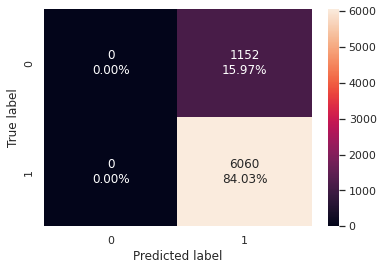

In [38]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training Performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_train, y_train)

**Randomized Search Tuning of Adaboost Oversampled** 

In [39]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_OS = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_OS.fit(X_train_OS,y_train_OS)

print("Best parameters are {}:" .format(randomized_cv_OS.best_params_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}:
CPU times: user 7.81 s, sys: 730 ms, total: 8.54 s
Wall time: 7min 5s


In [40]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
)

# Fit the model on training data
adb_tuned2.fit(X_train_OS, y_train_OS)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01)

**Checking model performance**

Training Performance Oversampled:
   Accuracy  Recall  Precision    F1
0     0.780   0.851      0.745 0.795
*************************************


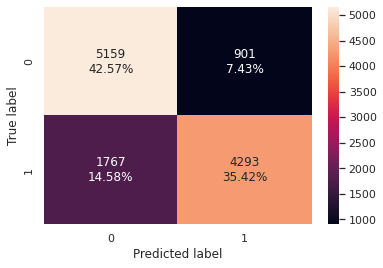

In [41]:
# Calculating different metrics on train set
Adaboost_random_train_OS = model_performance_classification_sklearn(
    adb_tuned2, X_train_OS, y_train_OS
)
print("Training Performance Oversampled:")
print(Adaboost_random_train_OS)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train_OS, y_train_OS)

**Randomized Search Tuning of Adaboost Undersampled** 

In [42]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv_US = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_US.fit(X_train_US,y_train_US)

print("Best parameters are {}:" .format(randomized_cv_US.best_params_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}:
CPU times: user 2.93 s, sys: 216 ms, total: 3.15 s
Wall time: 1min 37s


In [43]:
# building model with best parameters
adb_tuned3 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
)

# Fit the model on training data
adb_tuned3.fit(X_train_US, y_train_US)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01)

**Checking model performance**

Training Performance Undersampled:
   Accuracy  Recall  Precision    F1
0     0.782   0.832      0.756 0.793
*************************************


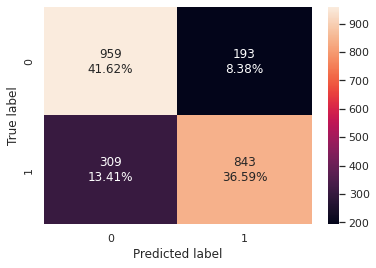

In [44]:
# Calculating different metrics on train set
Adaboost_random_train_US = model_performance_classification_sklearn(
    adb_tuned3, X_train_US, y_train_US
)
print("Training Performance Undersampled:")
print(Adaboost_random_train_US)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned3, X_train_US, y_train_US)

#  Model Performances

In [45]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_random_train.T,
        Adaboost_random_train_OS.T,
        Adaboost_random_train_US.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Default Sample",
    "Adaboost Oversampled",
    "Adaboost Undersampled"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Adaboost Default Sample,Adaboost Oversampled,Adaboost Undersampled
Accuracy,0.840,0.780,0.782
Recall,0.000,0.851,0.832
Precision,0.000,0.745,0.756
F1,0.000,0.795,0.793


####  Observations 
- The default sample seems unusable as it only predicted attrited customers, the accuracy was good but all other scores were invalid for our purposes.
- The most well-round sample seems to be the oversampled dataset. 

###  Performance on the test set

In [46]:
# Calculating different metrics on the test set
Adaboost_random_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("Test performance:")
Adaboost_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.712,0.799,0.333,0.470


- The accuracy and recall are both quite good with this model, but F1 and precision are still relatively low.

### Feature Importance Using Sklearn 

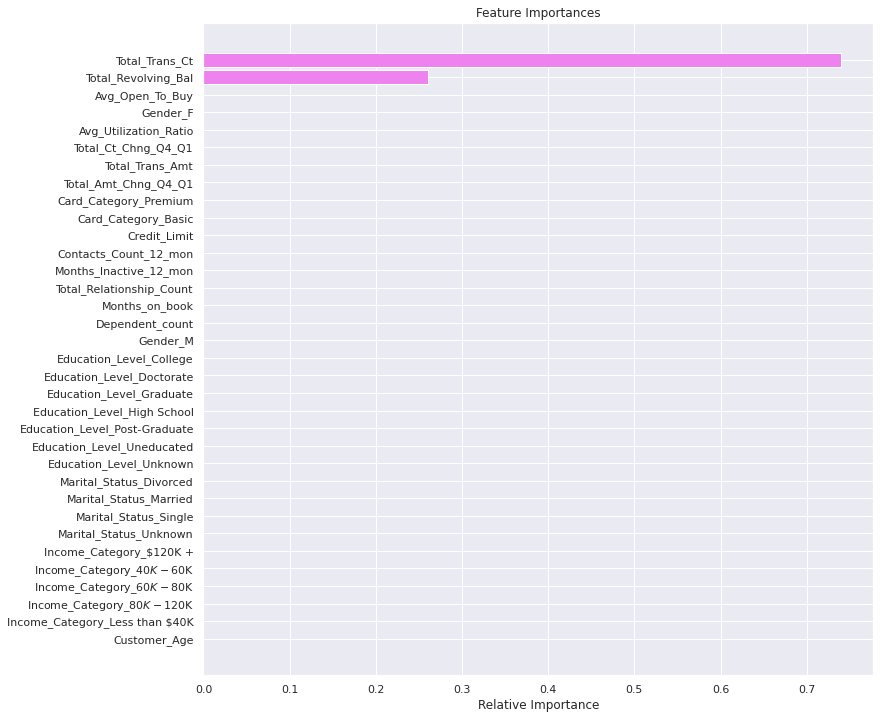

In [47]:
feature_names = X.columns
importances = adb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The **Total_Revolving_Ct** is the most important feature by far and **Total_Revolving_Bal** also seems to be the only other feature of any importance in predicting that a customer will end up closing their account.

#  Productionize the model 

In [48]:
# creating a list of numerical variables
my_list = list(X_train)

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [ 
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, my_list),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [49]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoost",
            AdaBoostClassifier(
            n_estimators=50,
            learning_rate=0.01,
            base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1)
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_OS, y_train_OS)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

In [50]:
# transforming and predicting on test data
model.predict(X_test)

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Attrited Customer'],
      dtype=object)

# Actionable Insights & Recommendations

- Based on the feature selection that we were able to develop earlier it seems that the best predictor that someone will go inactive or close their accounts is if they have large numbers of transactions. This can make some sense when we consider the 'churning' culture associated around credit cards that actively incentivizes people to open accounts, use that account for all of their purchases in a short amount of time, and then close their account after redeeming any associated benefits. 
- A potential solution for this may be for the bank to tailor their credit card products to specialize in rewards for a certain category of product, this way incentivizing the users to use that card for said product and possibly disincentivize them from making numerous transactions in a short amount of time just to get an introductory promotion. Another solution would be to offer incentives to customers for limiting their number of transactions during a certain period of time.
- This may sound counter-intuitive at first, but when you consider the actual business model of a bank offering credit cards then we would understand that the only way the bank makes money off of numerous transactions alone are their cut of the fees charged to the merchant per transaction made; however, for most banks offering credit cards this is miniscule in comparison to their largest revenue sources, generally speaking. These sources are interest and fees charged to cardholders.
- Because of this, the bank has a much greater incentive to keep long term customers as they would be more likely to collect interest payments over time and charge the customers related fees, such as the annual fees associated with many credit cards (including many that usually offer large introductory promos.)
- If the bank prioritizes keeping customers for longer instead of putting so much emphasis on getting customers to sign up then they will be able to get recurring revenue. It is also good to point out that most cards waive the annual fees associated with the card for the first year and so they are missing out on that type of revenue if the users only sign up for introductory promotions with the intent of leaving immediately after collecting.
- The other feature that was identified with this model is that of the revolving balance, which implies that some customers with high revolving balances feel incentivized to settle their account and leave to avoid continuing to pay high interest. This may be psychological due to the stress of having high balances, especially when considering the fees and interest that have already been mentioned. A potential solution to this may be offering incentives for being responsible with your credit and maintaining a low revolving balance between each month. The solutions that I have suggested would also be a more sustainable business model in the long-run and may lead to a better company image as well as a better relationship with the customer.
- Therefore, in addressing the issue of customers 'churning' cards I would suggest that the bank primarily focus on retaining customers in the long-term through these strategies I have mentioned and they would likely mitigate losses associated with fronting large introductory promotions to customers.